<a href="https://colab.research.google.com/github/Pranav24112004/Legal_Case_Similarity/blob/main/Final_Legal_Case_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade numpy scipy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [1]:
import pandas as pd
import numpy as np
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from transformers import LongformerModel, LongformerTokenizer
import torch

In [2]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv('/content/fully_cleaned_legal_cases.csv')

# Prepare data for Doc2Vec
documents = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(df["Cleaned_Text"])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Save the trained model
doc2vec_model.save("doc2vec_model")
print("✅ Doc2Vec model saved successfully!")

# Generate embeddings
doc2vec_embeddings = np.array([doc2vec_model.infer_vector(text.split()) for text in df["Cleaned_Text"]])

# Save embeddings
np.save("doc2vec_embeddings.npy", doc2vec_embeddings)
print("✅ Doc2Vec embeddings saved successfully!")

✅ Doc2Vec model saved successfully!
✅ Doc2Vec embeddings saved successfully!


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute cosine similarity matrix
doc2vec_similarity = cosine_similarity(doc2vec_embeddings)

# Convert to DataFrame
similarity_df_doc2vec = pd.DataFrame(doc2vec_similarity, index=df.index, columns=df.index)

# Display sample similarity scores
print(similarity_df_doc2vec.head())

        0         1         2         3         4         5         6    \
0  1.000000  0.328744  0.135952  0.187899  0.231247  0.173693  0.073839   
1  0.328744  1.000000  0.102597  0.200303  0.095225  0.212076  0.104800   
2  0.135952  0.102597  1.000000  0.252163 -0.019537  0.250183  0.258093   
3  0.187899  0.200303  0.252163  1.000000  0.267476  0.480300  0.242859   
4  0.231247  0.095225 -0.019537  0.267476  1.000000  0.083882  0.045145   

        7         8         9    ...       99        100       101       102  \
0 -0.064930  0.062190  0.163312  ...  0.459378  0.199618  0.209335  0.362823   
1  0.001473  0.196718  0.232033  ...  0.403553  0.195692  0.204742  0.255942   
2  0.258886  0.340301  0.251952  ...  0.195076  0.254909  0.280815  0.236247   
3  0.038052  0.065964  0.079201  ... -0.002079  0.485190  0.230235  0.496396   
4 -0.050336  0.040290  0.409254  ...  0.227585  0.134201  0.204918  0.386925   

        103       104       105       106       107       108  
0  0

In [4]:
from sentence_transformers import SentenceTransformer

# Load SBERT model
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Generate embeddings using SBERT
sbert_embeddings = sbert_model.encode(df["Cleaned_Text"].tolist(), convert_to_numpy=True)

# Check shape of embeddings
sbert_embeddings.shape

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(109, 384)

In [5]:
# Save the embeddings
np.save("sbert_embeddings.npy", sbert_embeddings)
print("✅ SBERT embeddings saved successfully!")

✅ SBERT embeddings saved successfully!


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute cosine similarity matrix
sbert_similarity = cosine_similarity(sbert_embeddings)

# Convert to DataFrame
sbert_similarity_df = pd.DataFrame(sbert_similarity, index=df.index, columns=df.index)

# Display sample similarity scores
print(sbert_similarity_df.head())

        0         1         2         3         4         5         6    \
0  1.000000  0.707274  0.700835  0.685567  0.740586  0.752329  0.718990   
1  0.707274  1.000000  0.604203  0.687699  0.700037  0.691808  0.621485   
2  0.700835  0.604203  1.000000  0.599884  0.628213  0.668132  0.748117   
3  0.685567  0.687699  0.599884  1.000000  0.719854  0.822814  0.612000   
4  0.740586  0.700037  0.628213  0.719854  1.000000  0.735451  0.701528   

        7         8         9    ...       99        100       101       102  \
0  0.751265  0.666016  0.673594  ...  0.706587  0.573013  0.706387  0.783930   
1  0.637714  0.611312  0.645896  ...  0.685364  0.603097  0.626248  0.727640   
2  0.744956  0.703649  0.642960  ...  0.673051  0.603255  0.600867  0.682689   
3  0.622178  0.599043  0.611682  ...  0.590447  0.721392  0.642151  0.761509   
4  0.807130  0.667592  0.750825  ...  0.646522  0.643131  0.648856  0.788984   

        103       104       105       106       107       108  
0  0

In [7]:
import torch
import numpy as np
import pandas as pd
from transformers import LongformerModel, LongformerTokenizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Longformer model & tokenizer
longformer_model = LongformerModel.from_pretrained("allenai/longformer-base-4096")
longformer_tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
longformer_model.to(device)

# Function to generate Longformer embeddings
def get_longformer_embeddings(texts):
    embeddings = []

    for text in texts:
        # Tokenize input text (truncate to max_length 4096)
        inputs = longformer_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=4096)

        # Move input tensors to the same device as the model
        inputs = {key: val.to(device) for key, val in inputs.items()}

        # Get model output
        with torch.no_grad():
            outputs = longformer_model(**inputs)

        # Use the [CLS] token representation as document embedding
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_embedding)

    return np.array(embeddings)

# Load dataset
df = pd.read_csv('/content/fully_cleaned_legal_cases.csv')

# Generate embeddings
longformer_embeddings = get_longformer_embeddings(df["Cleaned_Text"].tolist())

# Compute cosine similarity
longformer_similarity = cosine_similarity(longformer_embeddings)

# Convert to DataFrame
longformer_similarity_df = pd.DataFrame(longformer_similarity, index=df.index, columns=df.index)

# Display sample similarity scores
print(longformer_similarity_df.head())


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

        0         1         2         3         4         5         6    \
0  1.000000  0.997179  0.996706  0.997507  0.996247  0.997252  0.997790   
1  0.997179  1.000001  0.996744  0.997244  0.995606  0.996724  0.998174   
2  0.996706  0.996744  1.000000  0.997720  0.997673  0.996940  0.997955   
3  0.997507  0.997244  0.997720  1.000000  0.998140  0.998257  0.997946   
4  0.996247  0.995606  0.997673  0.998140  1.000001  0.996991  0.997018   

        7         8         9    ...       99        100       101       102  \
0  0.996777  0.997509  0.995320  ...  0.997558  0.997081  0.997362  0.996438   
1  0.996299  0.996689  0.994479  ...  0.997487  0.997563  0.997371  0.996979   
2  0.998407  0.998373  0.997504  ...  0.997897  0.997014  0.996618  0.997599   
3  0.997931  0.998139  0.997269  ...  0.998046  0.998263  0.997667  0.997646   
4  0.998035  0.997831  0.997993  ...  0.997627  0.996930  0.996310  0.997196   

        103       104       105       106       107       108  
0  0

In [8]:
# Save Longformer embeddings
np.save("longformer_embeddings.npy", longformer_embeddings)
print("✅ Longformer embeddings saved successfully!")

✅ Longformer embeddings saved successfully!


In [9]:
longformer_similarity_df.to_csv("longformer_similarity.csv", index=False)  # Saves without index
sbert_similarity_df.to_csv("sbert_similarity.csv", index=False)
similarity_df_doc2vec.to_csv("doc2vec_similarity.csv", index=False)

Columns in lawyer_feedback_df: Index(['Case_Index_1', 'Case_Index_2', 'Similarity_Score'], dtype='object')


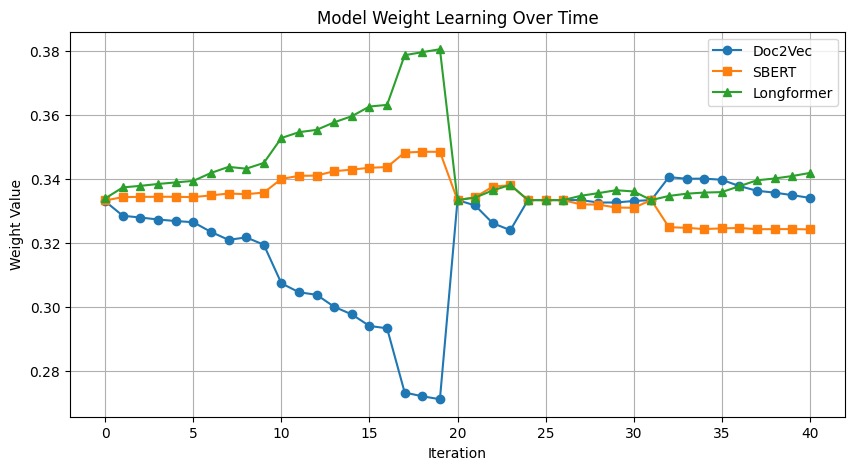

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load lawyer feedback CSV
lawyer_feedback_path = "Untitled spreadsheet - Sheet1.csv"
lawyer_feedback_df = pd.read_csv(lawyer_feedback_path)

# Display column names for debugging
print("Columns in lawyer_feedback_df:", lawyer_feedback_df.columns)

# Convert similarity matrices to NumPy arrays
doc2vec_similarity = similarity_df_doc2vec.to_numpy()
sbert_similarity = sbert_similarity_df.to_numpy()
longformer_similarity = longformer_similarity_df.to_numpy()

# Normalize similarity scores to [0,1]
def normalize(matrix):
    return (matrix - matrix.min()) / (matrix.max() - matrix.min())

doc2vec_similarity = normalize(doc2vec_similarity)
sbert_similarity = normalize(sbert_similarity)
longformer_similarity = normalize(longformer_similarity)

# Initialize equal weights
weights = {"doc2vec": 1/3, "sbert": 1/3, "longformer": 1/3}

# Define a minimum weight threshold to prevent collapse
MIN_WEIGHT = 0.2  # Each model keeps at least 20% weight

# Function to compute weighted similarity score
def compute_model_score():
    return (
        weights["doc2vec"] * doc2vec_similarity +
        weights["sbert"] * sbert_similarity +
        weights["longformer"] * longformer_similarity
    )

# Store weight updates
weight_log = []

# Function to update weights based on lawyer feedback
def update_weights(lawyer_feedback_df):
    global weights

    for _, row in lawyer_feedback_df.iterrows():
        i, j, lawyer_score = int(row["Case_Index_1"]), int(row["Case_Index_2"]), float(row["Similarity_Score"])

        # Check if indexes are within bounds
        if i >= doc2vec_similarity.shape[0] or j >= doc2vec_similarity.shape[1]:
            print(f"Skipping out-of-bounds index: ({i}, {j})")
            continue

        # Compute model similarity score
        model_score = compute_model_score()[i, j]

        # Calculate error
        error = lawyer_score - model_score

        # Compute individual errors
        doc2vec_error = abs(lawyer_score - doc2vec_similarity[i, j])
        sbert_error = abs(lawyer_score - sbert_similarity[i, j])
        longformer_error = abs(lawyer_score - longformer_similarity[i, j])

        total_error = doc2vec_error + sbert_error + longformer_error
        if total_error == 0:
            continue  # Avoid division by zero

        # Learning rate (proportional to squared error for smoother updates)
        learning_rate = 0.02 * (error ** 2)

        # Adjust weights proportionally
        weights["doc2vec"] -= learning_rate * (doc2vec_error / total_error)
        weights["sbert"] -= learning_rate * (sbert_error / total_error)
        weights["longformer"] -= learning_rate * (longformer_error / total_error)

        # Clip weights to prevent collapse
        for key in weights:
            weights[key] = max(MIN_WEIGHT, weights[key])

        # Re-normalize to ensure the sum is still 1
        total_weight = sum(weights.values())
        for key in weights:
            weights[key] /= total_weight

        # Log weight updates
        weight_log.append(weights.copy())

# Run weight update function
update_weights(lawyer_feedback_df)

# Convert weight log to DataFrame and save
weight_df = pd.DataFrame(weight_log)
weight_df.to_csv("weight_updates.csv", index=False)

# Plot weight trends
plt.figure(figsize=(10, 5))
plt.plot(weight_df["doc2vec"], label="Doc2Vec", marker="o")
plt.plot(weight_df["sbert"], label="SBERT", marker="s")
plt.plot(weight_df["longformer"], label="Longformer", marker="^")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Model Weight Learning Over Time")
plt.legend()
plt.grid()
plt.show()

In [12]:
import nltk
import re
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('all')
# Define legal stopwords
legal_stopwords = set(stopwords.words('english')) | {"plaintiff", "defendant", "judgment", "court", "bench", "vs", "v", "no"}

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean legal text
def clean_legal_text(text):
    if not text:
        return ""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces & line breaks
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    # Remove case metadata (case numbers, citations, extra references)
    text = re.sub(r'appeal no \d+ of \d+', '', text)
    text = re.sub(r'case no \d+', '', text)
    text = re.sub(r'judgment in \d+', '', text)

    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in legal_stopwords]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization

    return ' '.join(words)

# Function to read Markdown (.md) file
def read_markdown_file(md_file_path):
    with open(md_file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return clean_legal_text(text)

# Example Usage
md_file_path = "/content/similar-case (1).md"  # Path to the markdown file
preprocessed_text = read_markdown_file(md_file_path)
print("✅ Preprocessed Markdown Text:", preprocessed_text)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

✅ Preprocessed Markdown Text: appeal decree dated march delhi high appeal appellate decree jk chopra desai jj appellant rajiv sharma respondent vinod mehta kapoor cj malhotra j delivered malhotra j delivered main opinion kapoor cj delivered separate concurring opinion appeal certificate granted high delhi decree second appeal passed march question whether respondent entitled benefit delhi urban property tenancy act amended finally act xviii fact necessary disposal appeal follows th august appellant sharma instituted suit ejectment three person namely vinod mehta suresh kumar amit gupta property parcel land measuring sq yard part premise chandni chowk delhi notice quit served th july first two person described tenant third person purported purchaser structure land tenancy right therein plaint first two defendant described monthly tenant claim made rent tax although alleged arrears suit contested third filed written statement th october contending suit bad nonjoinder necessary party suit

In [13]:
import numpy as np
import torch
from gensim.models.doc2vec import Doc2Vec
from sentence_transformers import SentenceTransformer
from transformers import LongformerTokenizer, LongformerModel

# Load Pretrained Models
doc2vec_model = Doc2Vec.load("doc2vec_model")
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")
longformer_model = LongformerModel.from_pretrained("allenai/longformer-base-4096")
longformer_tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
longformer_model.to(device)

# Function to get Longformer embedding
def get_longformer_embedding(text):
    inputs = longformer_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=4096)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = longformer_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

# Generate embeddings for input text
doc2vec_embedding = doc2vec_model.infer_vector(preprocessed_text.split()).reshape(1, -1)
sbert_embedding = sbert_model.encode([preprocessed_text], convert_to_numpy=True)
longformer_embedding = get_longformer_embedding(preprocessed_text).reshape(1, -1)

print("✅ Generated embeddings for input case.")

✅ Generated embeddings for input case.


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Load precomputed embeddings
doc2vec_embeddings = np.load("doc2vec_embeddings.npy")
sbert_embeddings = np.load("sbert_embeddings.npy")
longformer_embeddings = np.load("longformer_embeddings.npy")

# Compute cosine similarity with the input case
doc2vec_sim = cosine_similarity(doc2vec_embedding, doc2vec_embeddings)[0]
sbert_sim = cosine_similarity(sbert_embedding, sbert_embeddings)[0]
longformer_sim = cosine_similarity(longformer_embedding, longformer_embeddings)[0]

# Weighted combination (using learned weights)
final_similarity = (0.334304 * doc2vec_sim) + (0.324033 * sbert_sim) + (0.341664 * longformer_sim)

# Find top 3 similar cases
top_indices = np.argsort(final_similarity)[-3:][::-1]

# Load original case data
df = pd.read_csv("fully_cleaned_legal_cases.csv")

# Display top 3 similar cases
top_cases = df.iloc[top_indices][["Cleaned_Text"]]
print("🔹 **Top 3 Similar Cases:**")
print(top_cases)

🔹 **Top 3 Similar Cases:**
                                         Cleaned_Text
19  appeal appeal decree dated january calcutta hi...
71  civil appeal order dated allahabad high cr sha...
96  appeal order dated bombay high sca no gl sangh...


In [15]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00


In [20]:
!pip install fpdf
from fpdf import FPDF

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=1df6cf1c090cd7162ec81960fb6240a70daa234453dd1ebdf0b35adcebb18aa8
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [25]:
import gradio as gr
# Set up environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models & data once
doc2vec_model = Doc2Vec.load("doc2vec_model")
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")
longformer_model = LongformerModel.from_pretrained("allenai/longformer-base-4096").to(device)
longformer_tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

doc2vec_embeddings = np.load("doc2vec_embeddings.npy")
sbert_embeddings = np.load("sbert_embeddings.npy")
longformer_embeddings = np.load("longformer_embeddings.npy")
df = pd.read_csv("fully_cleaned_legal_cases.csv")

# NLP setup
legal_stopwords = set(stopwords.words('english')) | {"plaintiff", "defendant", "judgment", "court", "bench", "vs", "v", "no"}
lemmatizer = WordNetLemmatizer()

def clean_legal_text(text):
    if not text:
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'appeal no \d+ of \d+', '', text)
    text = re.sub(r'case no \d+', '', text)
    text = re.sub(r'judgment in \d+', '', text)

    words = word_tokenize(text)
    words = [word for word in words if word not in legal_stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

def get_longformer_embedding(text):
    inputs = longformer_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=4096)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = longformer_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

def process_markdown(file):
    from datetime import datetime

    with open(file.name, "r", encoding="utf-8") as f:
        text = f.read()

    cleaned_text = clean_legal_text(text)

    doc2vec_embedding = doc2vec_model.infer_vector(cleaned_text.split()).reshape(1, -1)
    sbert_embedding = sbert_model.encode([cleaned_text], convert_to_numpy=True)
    longformer_embedding = get_longformer_embedding(cleaned_text).reshape(1, -1)

    # Similarity Calculation
    doc2vec_sim = cosine_similarity(doc2vec_embedding, doc2vec_embeddings)[0]
    sbert_sim = cosine_similarity(sbert_embedding, sbert_embeddings)[0]
    longformer_sim = cosine_similarity(longformer_embedding, longformer_embeddings)[0]

    final_similarity = (0.334304 * doc2vec_sim) + (0.324033 * sbert_sim) + (0.341664 * longformer_sim)
    top_indices = np.argsort(final_similarity)[-3:][::-1]
    top_cases = df.iloc[top_indices][["Text"]].reset_index(drop=True)

    # PDF Generation
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.set_text_color(0, 51, 102)
    pdf.cell(0, 10, "Legal Case Similarity Report", ln=True, align="C")  # <-- Removed emoji here

    pdf.set_font("Arial", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.ln(5)
    pdf.cell(0, 10, f"Generated on: {datetime.now().strftime('%d %B %Y, %H:%M')}", ln=True, align="C")
    pdf.ln(10)

    pdf.set_font("Arial", "B", 14)
    pdf.set_text_color(40, 40, 40)
    pdf.cell(0, 10, "Top 3 Most Similar Cases", ln=True)
    pdf.ln(5)

    for i, row in top_cases.iterrows():
        case_number = f"Case {i+1}"
        pdf.set_font("Arial", "B", 12)
        pdf.set_text_color(0, 0, 128)
        pdf.cell(0, 10, f"{case_number}", ln=True)
        pdf.set_font("Arial", "", 12)
        pdf.set_text_color(0, 0, 0)
        pdf.multi_cell(0, 8, row["Text"], align="J")
        pdf.ln(5)

    pdf.set_font("Arial", "I", 10)
    pdf.set_text_color(100, 100, 100)
    pdf.multi_cell(0, 8, "Note: These cases were selected based on semantic similarity using multiple NLP models including Doc2Vec, SBERT, and Longformer. This is an AI-generated report and should be verified for legal accuracy.", align="C")

    output_path = "/content/similar_cases_report.pdf"
    pdf.output(output_path)
    return output_path

# Gradio Interface
interface = gr.Interface(
    fn=process_markdown,
    inputs=gr.File(label="Upload .md Legal Case File"),
    outputs=gr.File(label="Download PDF Report"),
    title="Legal Case Similarity Finder",
    description="Upload a legal case (.md file), and this tool will find top 3 similar cases and generate a PDF report."
)

interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b3c928e72c205771e8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b3c928e72c205771e8.gradio.live
